#Experiment-2A

In [ ]:
import numpy as np
import cv2

image = cv2.imread("hogwarts.jpg", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Displayed Image",image)

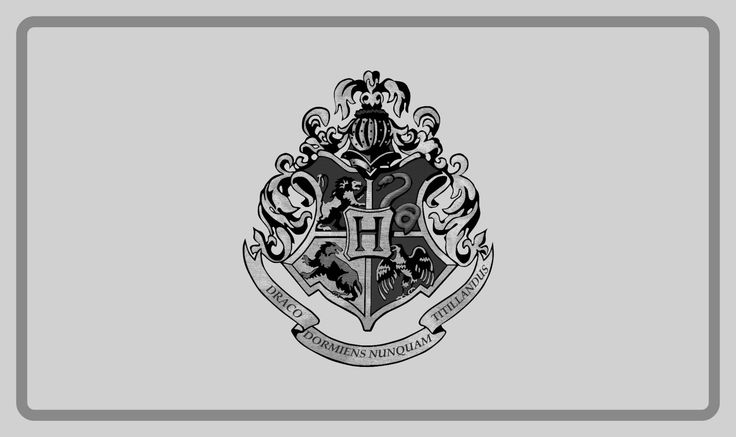

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
print("Size of image: ",image.shape)
print("Datatype of image: ",image.dtype)
print("Channels of image: ",image.ndim)
print("Total number of pixels (Size of image):",image.size)

Size of image:  (437, 736)
Datatype of image:  uint8
Channels of image:  2
Total number of pixels (Size of image): 321632


## Digital Negative

In [ ]:
dig_neg_img = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
     dig_neg_img[i,j] = 255 - image[i,j]

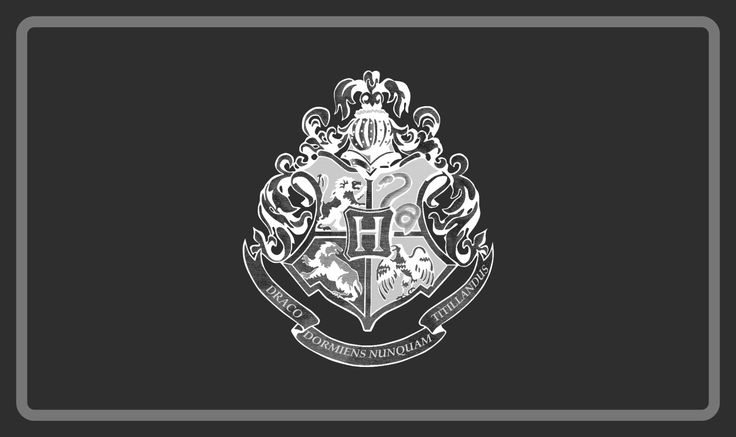

In [ ]:
cv2_imshow(dig_neg_img)

## Thresholding

In [ ]:
threshold_img = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
a = int(input("Enter threshold value: "))
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if image[i,j]<=a:
        threshold_img[i,j] = 0
    else:
        threshold_img[i,j] = 255

Enter threshold value: 50


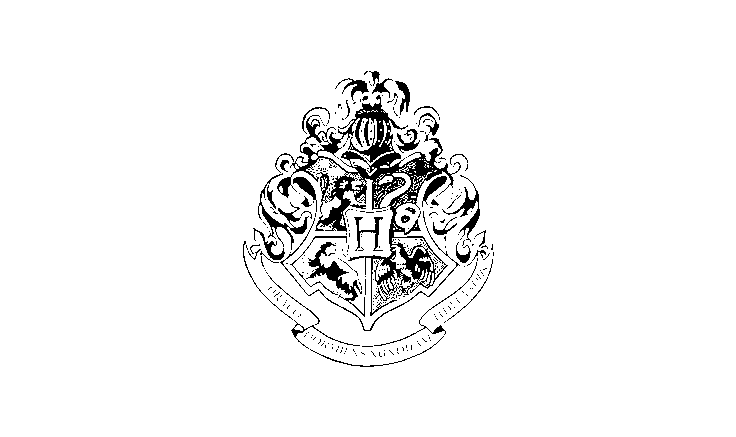

In [ ]:
cv2_imshow(threshold_img)

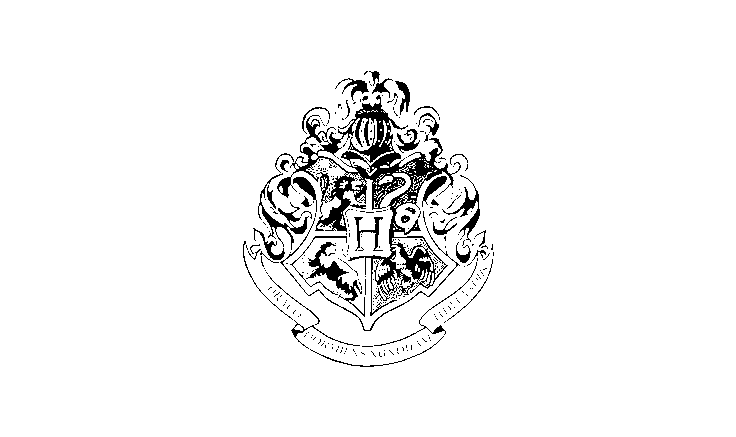

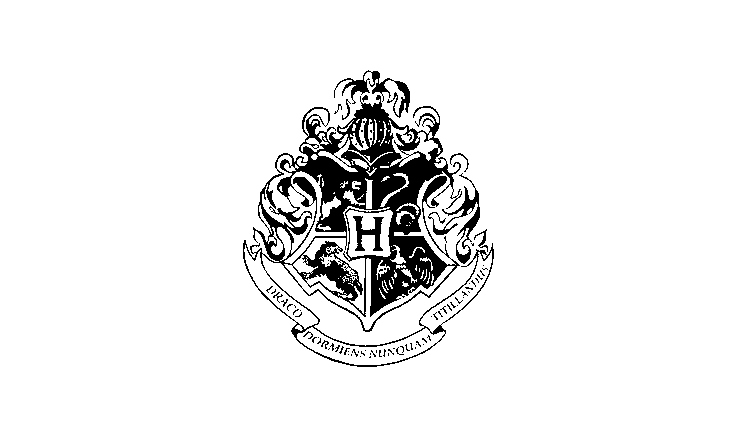

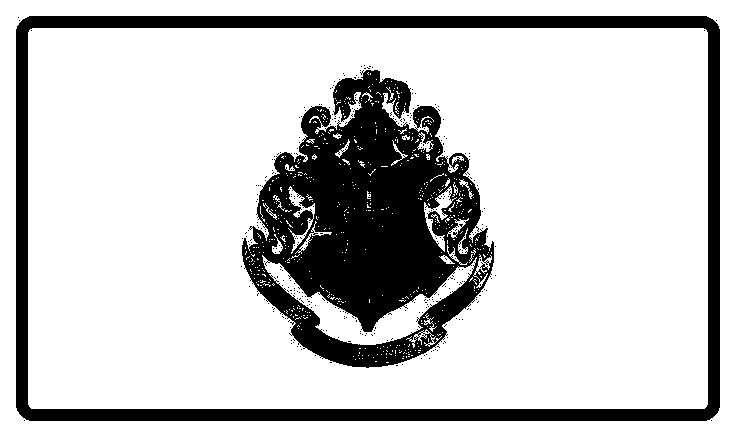

In [ ]:
threshold_img_50 = np.zeros(image.shape[:2], dtype="uint8")
threshold_img_100 = np.zeros(image.shape[:2], dtype="uint8")
threshold_img_200 = np.zeros(image.shape[:2], dtype="uint8")

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if image[i,j]<=50:
        threshold_img_50[i,j] = 0
    else:
        threshold_img_50[i,j] = 255

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if image[i,j]<=100:
        threshold_img_100[i,j] = 0
    else:
        threshold_img_100[i,j] = 255


for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if image[i,j]<=200:
        threshold_img_200[i,j] = 0
    else:
        threshold_img_200[i,j] = 255

cv2_imshow(threshold_img_50)
cv2_imshow(threshold_img_100)
cv2_imshow(threshold_img_200)

## Contrast Stretching

In [ ]:
contrast_img = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
l = float(input("Enter value of 'l' (Less than 1): "))
m = float(input("Enter value of 'm' (Greater than 1): "))
n = float(input("Enter value of 'n' (Less than 1): "))
a = float(input("Enter value of 'a': "))
b = float(input("Enter value of 'b': "))
V = l*a
W = V+m*(b-a)
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if (0 < image[i,j] <= a):
        contrast_img[i,j] = l*image[i,j]
    elif (a < image[i,j] <= b):
        contrast_img[i,j] = m*(image[i,j]-a) + V
    else:
        contrast_img[i,j] = n*(image[i,j]-b) + W

Enter value of 'l' (Less than 1): 0.2
Enter value of 'm' (Greater than 1): 2
Enter value of 'n' (Less than 1): 0.4
Enter value of 'a': 20
Enter value of 'b': 500


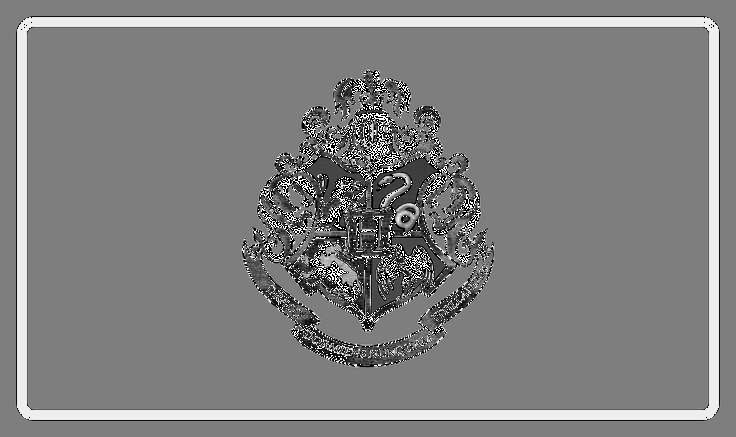

In [ ]:
cv2_imshow(contrast_img)

## Gray Level Slicing

Without Background

In [ ]:
GLS_img_1a = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
a = int(input("Enter value of 'a': "))
b = int(input("Enter value of 'b': "))
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if (a <= image[i,j] <= b):
      GLS_img_1a[i,j] = 255
    else:
      GLS_img_1a[i,j] = 0

Enter value of 'a': 100
Enter value of 'b': 150


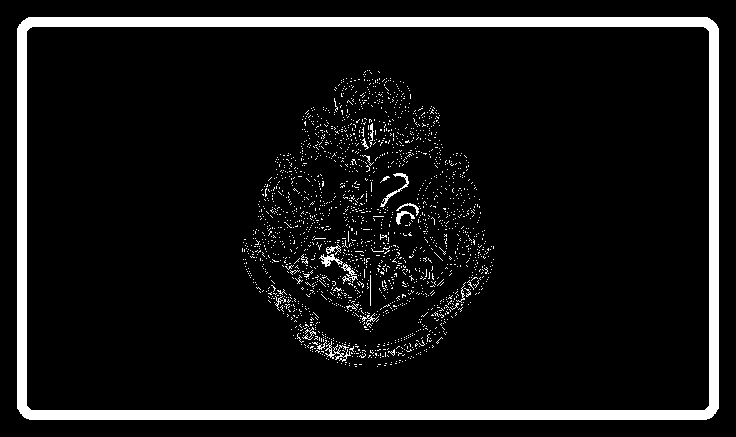

In [ ]:
cv2_imshow(GLS_img_1a)

In [ ]:
GLS_img_1b = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
a = int(input("Enter value of 'a': "))
b = int(input("Enter value of 'b': "))
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if (a <= image[i,j] <= b):
      GLS_img_1b[i,j] = 0
    else:
      GLS_img_1b[i,j] = 255

Enter value of 'a': 50
Enter value of 'b': 100


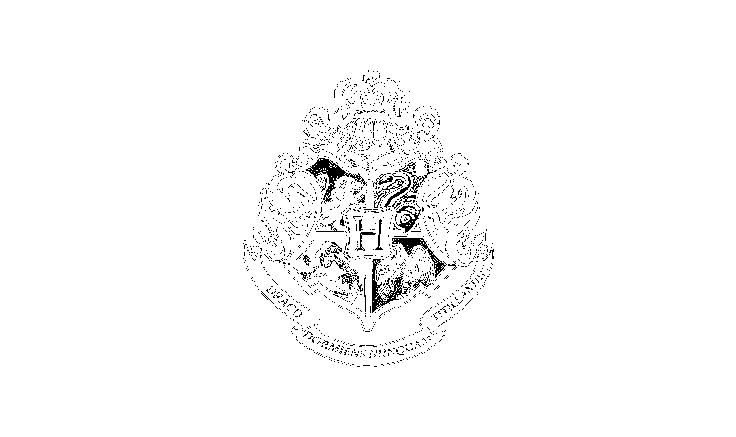

In [ ]:
cv2_imshow(GLS_img_1b)

With Background

In [ ]:
GLS_img_2a = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
a = int(input("Enter value of 'a': "))
b = int(input("Enter value of 'b': "))
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if (a <= image[i,j] <= b):
      GLS_img_2a[i,j] = 255
    else:
      GLS_img_2a[i,j] = image[i,j]

Enter value of 'a': 50
Enter value of 'b': 100


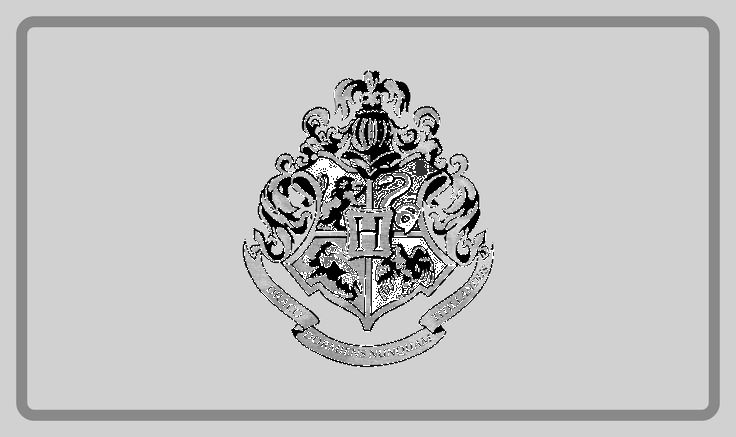

In [ ]:
cv2_imshow(GLS_img_2a)

In [ ]:
GLS_img_2b = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
a = int(input("Enter value of 'a': "))
b = int(input("Enter value of 'b': "))
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if (a <= image[i,j] <= b):
      GLS_img_2b[i,j] = 0
    else:
      GLS_img_2b[i,j] = image[i,j]

Enter value of 'a': 120
Enter value of 'b': 200


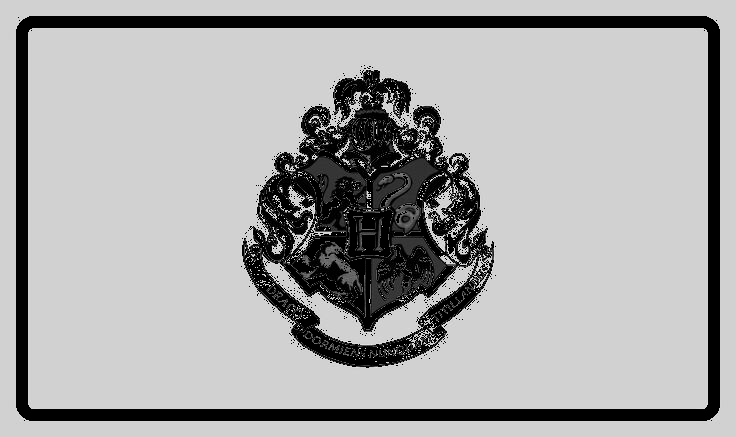

In [ ]:
cv2_imshow(GLS_img_2b)



---



#Experiment-2B

## Dynamic Range Compression

In [ ]:
DRC_img_1 = np.zeros(image.shape[:2], dtype="uint8")
DRC_img_2 = np.zeros(image.shape[:2], dtype="uint8")
DRC_img_3 = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
# c = 10
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    DRC_img_1[i,j] = (-10) * np.log(1 + abs(image[i,j]))    # c=-10
    DRC_img_2[i,j] = 10 * np.log(1 + abs(image[i,j]))       # c=10
    DRC_img_3[i,j] = 150 * np.log(1 + abs(image[i,j]))      # c=150

/tmp/ipython-input-3276061211.py:4: RuntimeWarning: overflow encountered in scalar add
  DRC_img_1[i,j] = (-10) * np.log(1 + abs(image[i,j]))    # c=-10
/tmp/ipython-input-3276061211.py:4: RuntimeWarning: divide by zero encountered in log
  DRC_img_1[i,j] = (-10) * np.log(1 + abs(image[i,j]))    # c=-10
/tmp/ipython-input-3276061211.py:4: RuntimeWarning: invalid value encountered in cast
  DRC_img_1[i,j] = (-10) * np.log(1 + abs(image[i,j]))    # c=-10
/tmp/ipython-input-3276061211.py:5: RuntimeWarning: overflow encountered in scalar add
  DRC_img_2[i,j] = 10 * np.log(1 + abs(image[i,j]))       # c=10
/tmp/ipython-input-3276061211.py:5: RuntimeWarning: divide by zero encountered in log
  DRC_img_2[i,j] = 10 * np.log(1 + abs(image[i,j]))       # c=10
/tmp/ipython-input-3276061211.py:5: RuntimeWarning: invalid value encountered in cast
  DRC_img_2[i,j] = 10 * np.log(1 + abs(image[i,j]))       # c=10
/tmp/ipython-input-3276061211.py:6: RuntimeWarning: overflow encountered in scalar add
  

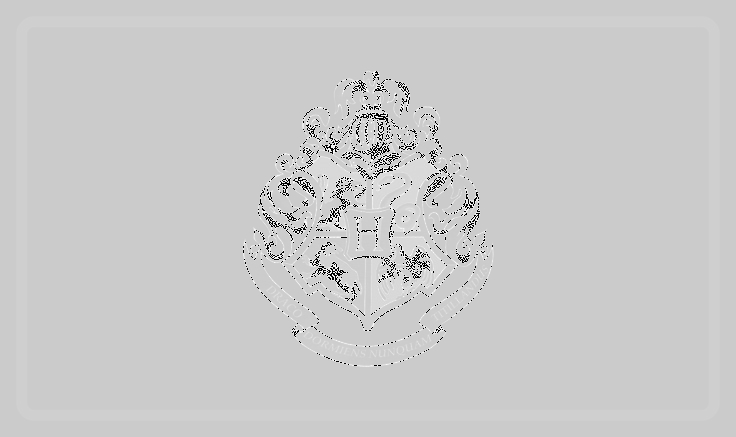

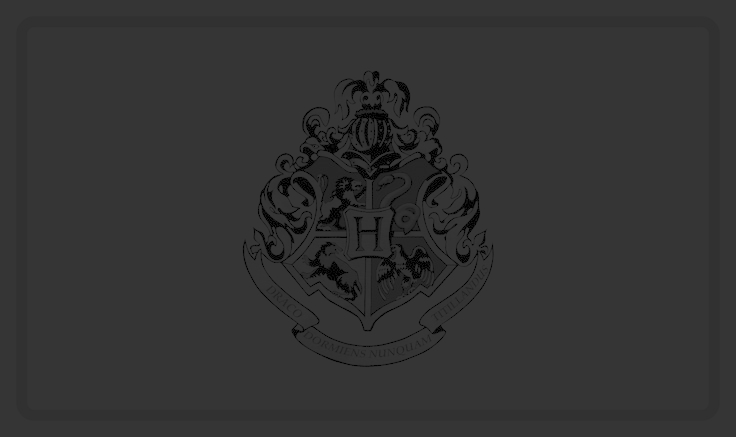

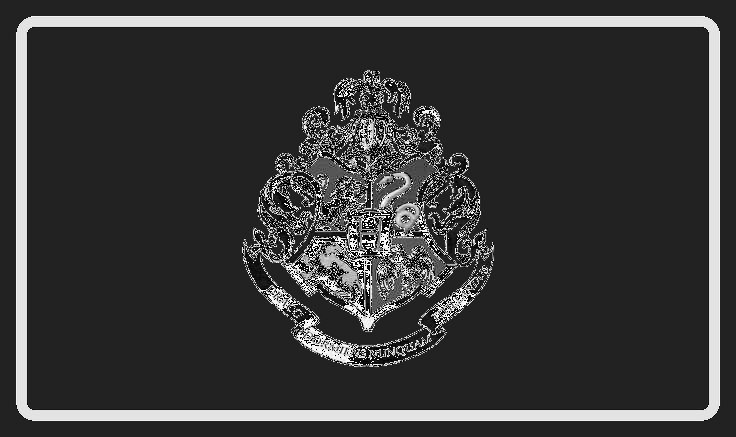

In [ ]:
cv2_imshow(DRC_img_1)
cv2_imshow(DRC_img_2)
cv2_imshow(DRC_img_3)

##Power Law Transformation

In [ ]:
PLT_img_1 = np.zeros(image.shape[:2], dtype="uint8")
PLT_img_2 = np.zeros(image.shape[:2], dtype="uint8")
PLT_img_3 = np.zeros(image.shape[:2], dtype="uint8")

In [ ]:
c = 10
# Y = 25
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    PLT_img_1[i,j] = c*(image[i,j]**(0.4))  # Y(gamma) = 0.4
    PLT_img_2[i,j] = c*(image[i,j]**1)      # Y(gamma) = 1
    PLT_img_3[i,j] = c*(image[i,j]**20)     # Y(gamma) = 20

/tmp/ipython-input-4068932478.py:6: RuntimeWarning: overflow encountered in scalar multiply
  PLT_img_2[i,j] = c*(image[i,j]**1)      # Y(gamma) = 1
/tmp/ipython-input-4068932478.py:7: RuntimeWarning: overflow encountered in scalar multiply
  PLT_img_3[i,j] = c*(image[i,j]**20)     # Y(gamma) = 20


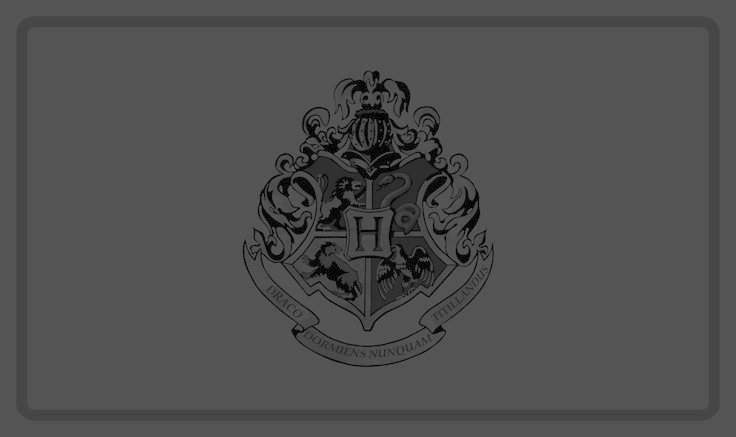

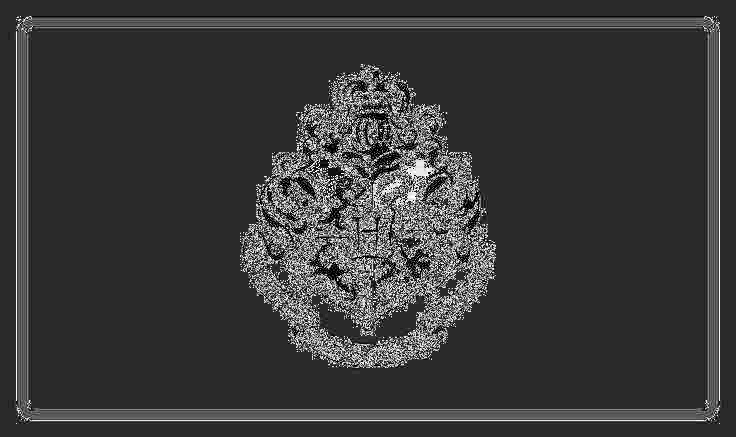

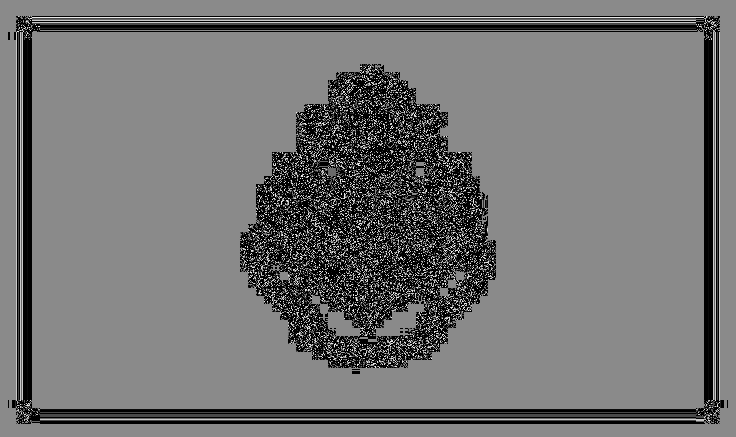

In [ ]:
cv2_imshow(PLT_img_1)
cv2_imshow(PLT_img_2)
cv2_imshow(PLT_img_3)